# Preparação dos dados

In [1]:
import pandas as pd

# Lê o arquivo .csv
df = pd.read_csv('ge_news.csv')

# Exibe as primeiras linhas
df.head()

,date,time,title,text,link,club
0,10/11/2022,19h55,Convocados do Uruguai para a Copa do Mundo 202...,O técnico Diego Alonso divulgou a lista dos 2...,https://ge.globo.com/futebol/copa-do-mundo/not...,athletico-pr
1,22/12/2017,10h04,Conmebol divulga tabela detalhada da pré e da ...,Argentinos são destaques no caminho dos brasi...,https://globoesporte.globo.com/futebol/liberta...,athletico-pr
2,11/02/2018,08h00,"Com assistência, Demethryus recebe elogios no ...",O meia Demethryus conseguiu aproveitar bem a ...,https://globoesporte.globo.com/pr/futebol/time...,athletico-pr
3,18/12/2020,12h48,Athletico confirma fim de contrato com Welling...,A reportagem do ge já havia adiantado que as ...,https://globoesporte.globo.com/pr/futebol/time...,athletico-pr
4,13/09/2018,22h17,"Alô, cartoleiros! Atlético-PR passa limpo cont...","O atacante Marcelo Cirino, desfalque já nos ú...",https://globoesporte.globo.com/pr/futebol/time...,athletico-pr


In [13]:
# Removendo simultaneamente as colunas de índice 0, 1, 4 (date, time and link)
column_indices = [0, 1, 4]
df.drop([df.columns[i] for i in column_indices], axis=1, inplace=True)

In [14]:
df.head()

,title,text,club
0,Convocados do Uruguai para a Copa do Mundo 202...,O técnico Diego Alonso divulgou a lista dos 2...,athletico-pr
1,Conmebol divulga tabela detalhada da pré e da ...,Argentinos são destaques no caminho dos brasi...,athletico-pr
2,"Com assistência, Demethryus recebe elogios no ...",O meia Demethryus conseguiu aproveitar bem a ...,athletico-pr
3,Athletico confirma fim de contrato com Welling...,A reportagem do ge já havia adiantado que as ...,athletico-pr
4,"Alô, cartoleiros! Atlético-PR passa limpo cont...","O atacante Marcelo Cirino, desfalque já nos ú...",athletico-pr


In [15]:
# Fundindo colunas 'title' e 'text' para a coluna 'title_and_text'
df['data'] = df['title'] + ' ' + df['text']

In [16]:
df.head()

,title,text,club,data
0,Convocados do Uruguai para a Copa do Mundo 202...,O técnico Diego Alonso divulgou a lista dos 2...,athletico-pr,Convocados do Uruguai para a Copa do Mundo 202...
1,Conmebol divulga tabela detalhada da pré e da ...,Argentinos são destaques no caminho dos brasi...,athletico-pr,Conmebol divulga tabela detalhada da pré e da ...
2,"Com assistência, Demethryus recebe elogios no ...",O meia Demethryus conseguiu aproveitar bem a ...,athletico-pr,"Com assistência, Demethryus recebe elogios no ..."
3,Athletico confirma fim de contrato com Welling...,A reportagem do ge já havia adiantado que as ...,athletico-pr,Athletico confirma fim de contrato com Welling...
4,"Alô, cartoleiros! Atlético-PR passa limpo cont...","O atacante Marcelo Cirino, desfalque já nos ú...",athletico-pr,"Alô, cartoleiros! Atlético-PR passa limpo cont..."


In [17]:
from sklearn.preprocessing import LabelEncoder

# Cria um objeto LabelEncoder
le = LabelEncoder()

# Fitting the encoder and transforming the 'Animals' column
df['label'] = le.fit_transform(df['club'])

In [18]:
# Removendo as três colunas originais, não precisamos mais delas
column_indices = [0, 1, 2]
df.drop([df.columns[i] for i in column_indices], axis=1, inplace=True)

In [19]:
df.head()

,data,label
0,Convocados do Uruguai para a Copa do Mundo 202...,0
1,Conmebol divulga tabela detalhada da pré e da ...,0
2,"Com assistência, Demethryus recebe elogios no ...",0
3,Athletico confirma fim de contrato com Welling...,0
4,"Alô, cartoleiros! Atlético-PR passa limpo cont...",0


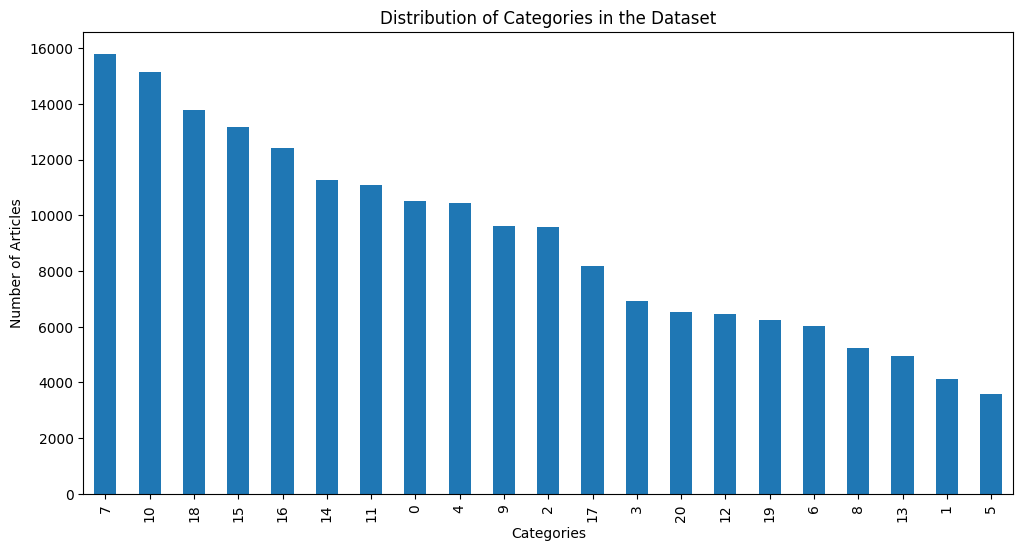

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame is named `ds` and has columns 'data' and 'label'
category_counts = df['label'].value_counts()

# Plot the distribution of categories
plt.figure(figsize=(12, 6))
category_counts.plot(kind='bar')
plt.xlabel('Categories')
plt.ylabel('Number of Articles')
plt.title('Distribution of Categories in the Dataset')
plt.show()

# Pré-processamento

In [21]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Pichau\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Pichau\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Pichau\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Pichau\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [22]:
import string
from collections import defaultdict
from tqdm import tqdm

tqdm.pandas()

def preprocess_text(df, text_column):
    """
    Realiza o pré-processamento dos dados de texto em um DataFrame do Pandas.
    Remove pontuação, palavras comuns (stop words) e aplica lematização.
    """
    
    # Cria uma tabela de tradução que mapeia cada caractere de pontuação do módulo `string.punctuation` 
    # para `None` (ou seja, remove-os do texto).
    print("Removendo pontuação...")
    translator = str.maketrans('', '', string.punctuation) 
    df[text_column] = df[text_column].progress_apply(lambda x: x.translate(translator))
        
    # Usa o método `apply()` do Pandas DataFrame para aplicar o tokenizador `word_tokenize()` do NLTK 
    # a cada elemento da coluna `text_column` especificada em `df_clean` após converter cada elemento 
    # para letras minúsculas.
    print("Aplicando tokenização...")
    df[text_column] = df[text_column].progress_apply(lambda x: word_tokenize(x.lower()))

    # Remove palavras comuns (stop words)
    print("Removendo stopwords...")
    stop_words = set(stopwords.words('portuguese'))
    df[text_column] = df[text_column].progress_apply(lambda x: [word for word in x if word not in stop_words])
       
    def get_wordnet_pos(tag):
        """
        Mapeia a tag POS (classe gramatical) para o primeiro caractere usado pelo WordNetLemmatizer
        """
        if tag.startswith('J'):
            return wordnet.ADJ
        elif tag.startswith('V'):
            return wordnet.VERB
        elif tag.startswith('R'):
            return wordnet.ADV
        else:
            return wordnet.NOUN
    
    def lemmatize_words(words):
        lemmatizer = WordNetLemmatizer()
        pos_tagged_words = nltk.pos_tag(words)
        return [lemmatizer.lemmatize(word, get_wordnet_pos(tag)) for word, tag in pos_tagged_words]
    
    # Retorna o valor correspondente à tag POS da palavra, usando o dicionário de mapeamento criado acima
    print("Computando Lematização...")
    df[text_column] = df[text_column].progress_apply(lemmatize_words)

    #return df_clean
    
preprocess_text(df, 'data')

Removendo pontuação...


100%|████████████████████████████████████████████████████████████████████████| 191005/191005 [00:25<00:00, 7378.13it/s]


Aplicando tokenização...


100%|████████████████████████████████████████████████████████████████████████| 191005/191005 [03:05<00:00, 1027.84it/s]


Removendo stopwords...


100%|███████████████████████████████████████████████████████████████████████| 191005/191005 [00:08<00:00, 23126.90it/s]


Computando Lematização...


100%|██████████████████████████████████████████████████████████████████████████| 191005/191005 [38:09<00:00, 83.42it/s]


In [23]:
# Salvar em formato pickle
df.to_pickle("ge.pkl")

df

,data,label
0,"[convocados, uruguai, copa, mundo, 2022, veja,...",0
1,"[conmebol, divulga, tabela, detalhada, pré, fa...",0
2,"[assistência, demethryus, recebe, elogios, atl...",0
3,"[athletico, confirma, fim, contrato, wellingto...",0
4,"[alô, cartoleiros, atléticopr, passa, limpo, c...",0
...,...,...
191000,"[mano, faz, trabalho, técnico, bruno, silva, e...",9
191001,"[após, eliminação, cruzeiro, copa, brasil, per...",9
191002,"[coleta, sangue, faz, jogadores, cruzeiro, aco...",9
191003,"[cruzeiro, encerra, preparação, enfrentar, gua...",9


In [3]:
df = pd.read_pickle("ge.pkl")

# Treinando modelo Word2vec

In [4]:
from gensim.models import Word2Vec
from gensim.models.callbacks import CallbackAny2Vec

In [5]:
# Custom callback class for Word2Vec training
class SimpleTextCallback(CallbackAny2Vec):
    def __init__(self, total_epochs):
        self.epoch = 0
        self.total_epochs = total_epochs

    def on_epoch_end(self, model):
        self.epoch += 1
        print(f"Epoch {self.epoch} of {self.total_epochs} completed.")

In [6]:
# Extract tokenized documents from the 'data' column
preprocessed_articles = df['data'].tolist()

# Initialize the Word2Vec model
word2vec_model = Word2Vec(vector_size=100, window=5, min_count=1, workers=4)

# Build the vocabulary
word2vec_model.build_vocab(preprocessed_articles)

# Train the Word2Vec model with the custom progress update
total_epochs = 5
callback = SimpleTextCallback(total_epochs)
word2vec_model.train(preprocessed_articles, total_examples=word2vec_model.corpus_count, 
                     epochs=total_epochs, callbacks=[callback])

Epoch 1 of 5 completed.
Epoch 2 of 5 completed.
Epoch 3 of 5 completed.
Epoch 4 of 5 completed.
Epoch 5 of 5 completed.


(222969906, 227617375)

In [7]:
# Find words most similar to target word
word2vec_model.wv.most_similar('flamengo')

[('fluminense', 0.8978539109230042),
 ('palmeiras', 0.8660756945610046),
 ('corinthian', 0.8230648040771484),
 ('atléticomg', 0.8158465623855591),
 ('botafogo', 0.812190055847168),
 ('grêmio', 0.811341404914856),
 ('vasco', 0.8036608099937439),
 ('cruzeiro', 0.7411160469055176),
 ('corinthians', 0.7310159206390381),
 ('internacional', 0.7195398211479187)]

In [8]:
# Create word-to-index and index-to-word dictionaries
word_to_index = {}
index_to_word = {}
for i, word in enumerate(word2vec_model.wv.index_to_key):
    word_to_index[word] = i + 1
    index_to_word[i + 1] = word

In [9]:
from tqdm import tqdm

# Convert tokenized news into sequences of indices
sequences = []
for tokens in tqdm(preprocessed_articles):
    sequence = []
    for token in tokens:
        if token in word_to_index:
            sequence.append(word_to_index[token])
    sequences.append(sequence)

100%|████████████████████████████████████████████████████████████████████████| 191005/191005 [00:20<00:00, 9185.58it/s]


In [10]:
# Map the sequence of indices in sequences[0] back to a text representation
text = " ".join([index_to_word[i] for i in sequences[0]])

# Print the resulting text representation
print(text)

convocados uruguai copa mundo 2022 veja lista técnico diego alonso divulgou lista 26 convocados uruguai copa mundo ídolos veteranos atacantes cavani suárez puxam elenco celeste ainda arrascaeta flamengo jovens valverde real madrid darwin núñez liverpool símbolos renovação alonso optou manter zagueiro ronald araújo barcelona lista defensor recupera lesão coxa joga desde fim setembro expectativa inicial poderia voltar jogar 2023 veja anúncio convocados uruguai copa mundo além arrascaeta outros doi jogadores atuam brasil chamados diego alonso lateral varela flamengo atacante canobbio athleticopr outros conhecidos torcida brasileira lista veterano zagueiro diego godín exatléticomg atualmente vélez sarsfield lateral matías viña expalmeiras atualmente rom uruguai vai terminar preparação copa mundo abu dhabi emirados árabes onde parte delegação desembarcou nesta quintafeira ida catar ocorre próximo dia 19 celeste grupo h copa lado portugal coreia sul gana estreia contra sulcoreanos dia 24 est

In [11]:
import numpy as np

# Compute the length of each sequence in the dataset
sequence_lengths = [len(seq) for seq in sequences]

# Compute the mean and maximum sequence length
mean_length = np.mean(sequence_lengths)
max_length = max(sequence_lengths)

print("Mean sequence length: ", mean_length)
print("Maximum sequence length: ", max_length)

Mean sequence length:  238.3365618701081
Maximum sequence length:  5411


In [12]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Set the maximum sequence length
max_length = int(mean_length) * 3

# Pad sequences
padded_sequences = pad_sequences(sequences, maxlen=max_length, padding='post')

In [13]:
# Get the total number of unique values in the 'labels' column of the dataframe
df['label'].nunique()

21

In [14]:
import tensorflow.keras.utils as ku

# Convert labels to one-hot encoded vectors
num_classes = 21
labels = ku.to_categorical(df['label'], num_classes)

In [15]:
labels

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(padded_sequences, labels, test_size=0.2)

# GPU

In [17]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

# Create LSTM model
model = Sequential()
model.add(Embedding(input_dim=len(word2vec_model.wv.key_to_index) + 1, 
                    output_dim=word2vec_model.vector_size, input_length=max_length))
model.add(LSTM(units=128))
model.add(Dense(units=len(labels[0]), activation='softmax'))

# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
1469/4776 [========>.....................] - ETA: 38:25 - loss: 2.9701 - accuracy: 0.0780

In [ ]:
model.save('ge_lstm.h5')

In [ ]:
from tensorflow.keras.models import load_model

loaded_model = load_model('ge_lstm.h5')

## Referências

* https://medium.com/@everton.tomalok/word2vec-e-sua-import%C3%A2ncia-na-etapa-de-pr%C3%A9-processamento-d0813acfc8ab
* https://www.youtube.com/watch?v=hQwFeIupNP0
* https://www.youtube.com/watch?v=ISPId9Lhc1g
* https://jalammar.github.io/illustrated-word2vec/
* https://towardsdatascience.com/a-beginners-guide-to-word-embedding-with-gensim-word2vec-model-5970fa56cc92